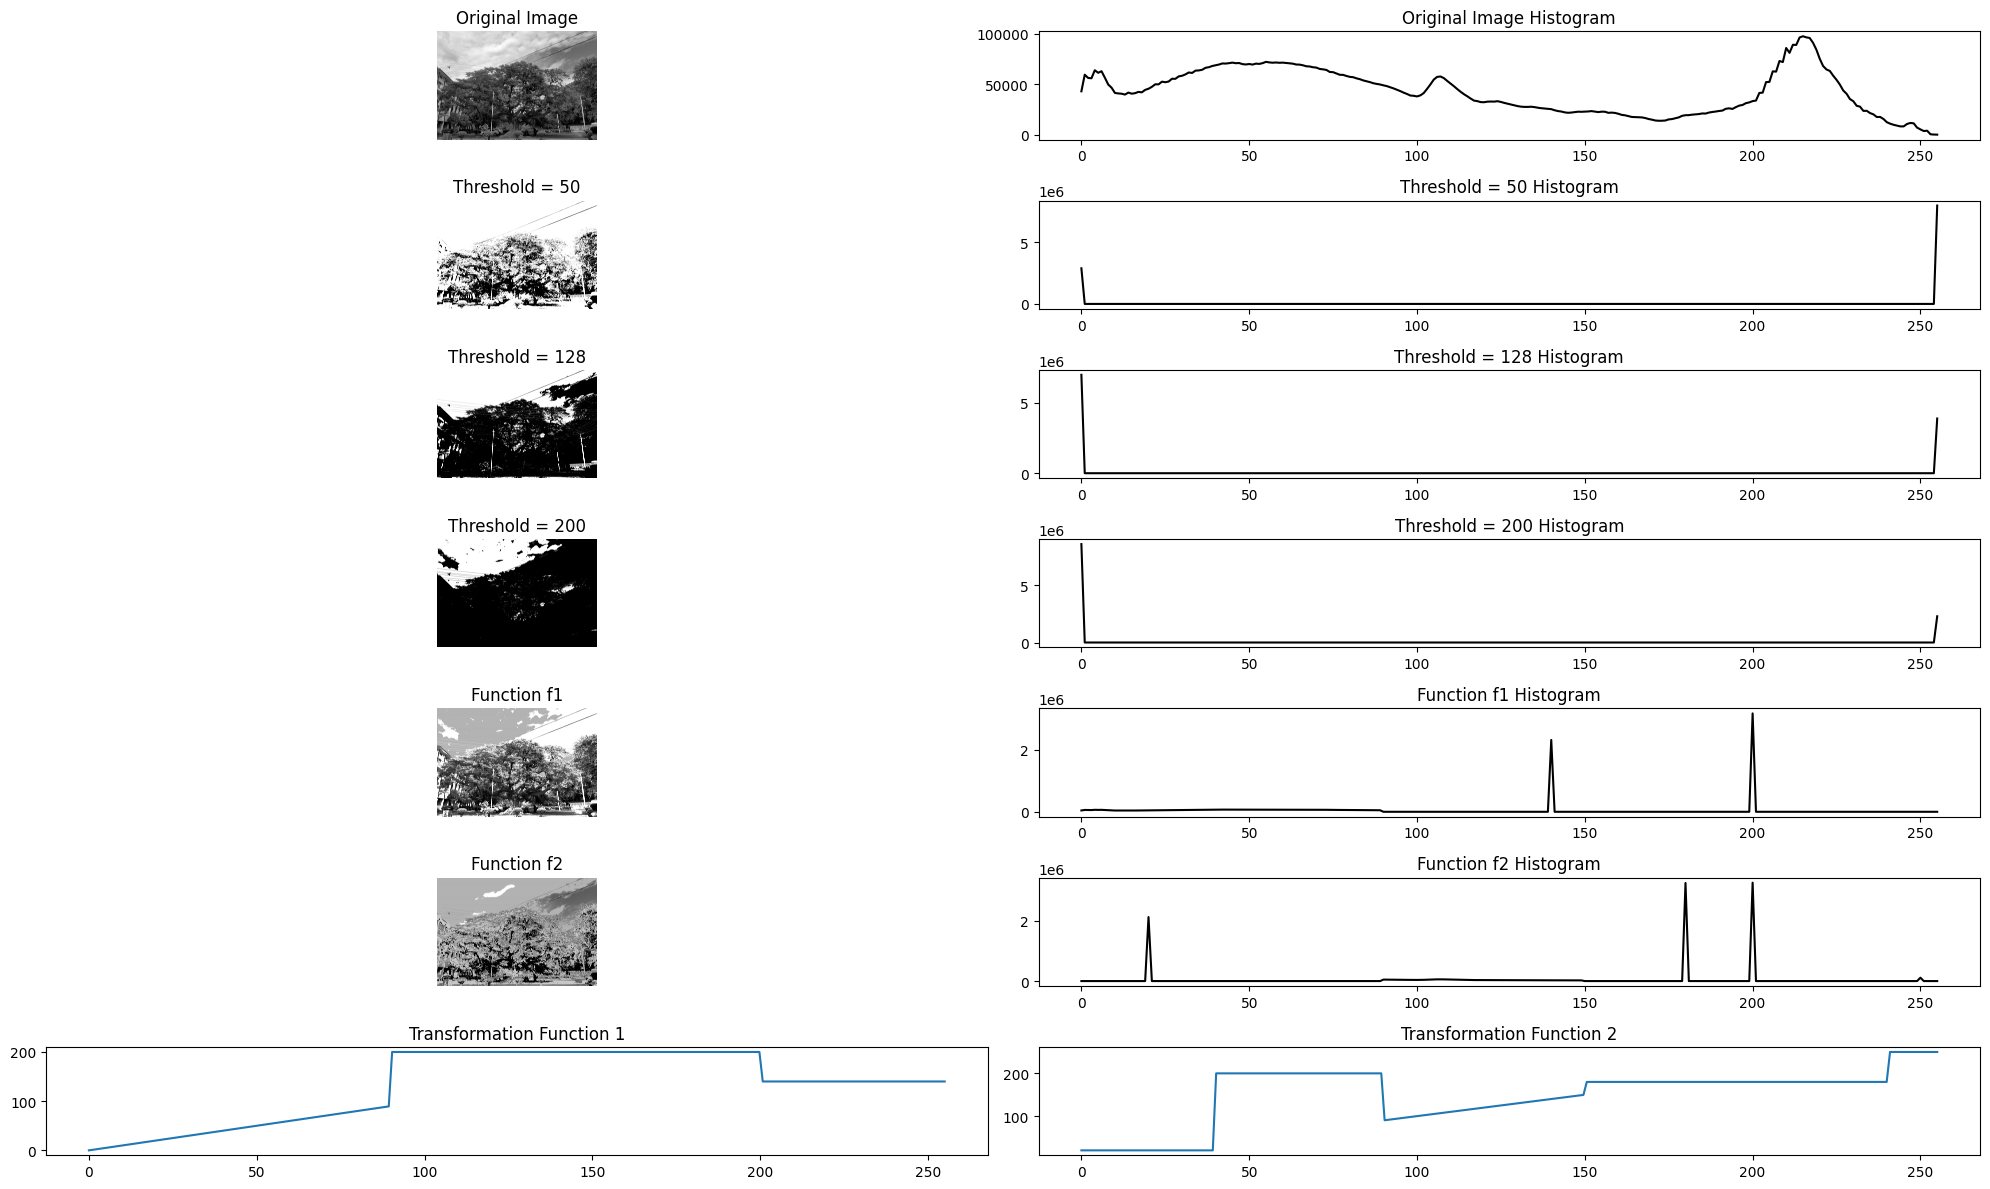

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def main():
    img_path = "/home/apd/code/CSE_Lab/CSE_4_1_DIP/DIP/Image/image11.jpg"
    img = cv2.imread(img_path, 0)
    img1=img.copy()

    plt.figure(figsize=(20, 12))

    # ---- Step Function Thresholding ----
    thresholds = [50, 128, 200]
    fig_num = 1
    # orginal Image:
    show_image_and_hist(img1, "Original Image", fig_num)
    fig_num += 2

    for t in thresholds:
        img1=step_func(t,img)
        show_image_and_hist(img1, f"Threshold = {t}", fig_num)
        fig_num += 2


    # ---- Transformation Function 1 ----
    f1_img = apply_transformation1(img)
    show_image_and_hist(f1_img, "Function f1", fig_num)
    fig_num += 2


    # ---- Transformation Function 2 ----
    f2_img = apply_transformation2(img)
    show_image_and_hist(f2_img, "Function f2", fig_num)
    fig_num += 2


    x1_val=np.linspace(0,255,255)
    y1_val=[transform_f1(x) for x in x1_val]
    plt.subplot(7,2,fig_num)
    plt.plot(x1_val,y1_val)
    plt.title("Transformation Function 1")


    fig_num+=1;
    x1_val=np.linspace(0,255,255)
    y1_val=[transform_f2(x) for x in x1_val]
    plt.subplot(7,2,fig_num)
    plt.plot(x1_val,y1_val)
    plt.title("Transformation Function 2")

    fig_num+=1;

    plt.tight_layout()
    plt.show()


def step_func(threshold,img):
  rows,cols=img.shape
  new_img=np.zeros((rows,cols),dtype=np.uint8)
  for i in range(rows):
    for j in range(cols):
      value=img[i,j]
      if(value>threshold):
        new_img[i,j]=255
  return new_img
# --------- Transformation Functions ---------
def transform_f1(x):
    if x<90:
        return x
    elif x<200:
        return 200
    else:
        return 140


def transform_f2(x):
    if x<40:
        return 20
    elif x<90:
        return 200
    elif x<150:
        return x
    elif x<240:
        return 180
    else:
        return 250


# --------- Apply transformation pixel-wise ---------
def apply_transformation1(img):
  rows,cols=img.shape
  new_img=np.zeros((rows,cols),dtype=np.uint8)
  for i in range(rows):
    for j in range(cols):
      value=img[i,j]
      new_img[i,j]=transform_f1(value)
  return new_img

def apply_transformation2(img):
  rows,cols=img.shape
  new_img=np.zeros((rows,cols),dtype=np.uint8)
  for i in range(rows):
    for j in range(cols):
      value=img[i,j]
      new_img[i,j]=transform_f2(value)
  return new_img

# --------- Display helper ---------
def show_image_and_hist(img,title,fig_num):
    # Show Image
    plt.subplot(7,2,fig_num)
    plt.imshow(img,cmap="gray")
    plt.title(title)
    plt.axis("off")

    # Compute Histogram using cv2
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])

    # Plot Histogram
    plt.subplot(7, 2, fig_num + 1)
    x=np.arange(0,256)
    plt.plot(x,hist, color="black")
    plt.title(title + " Histogram")
    # plt.xlim([0, 256])


if __name__ == "__main__":
    main()
